In [50]:
import pandas as pd

In [97]:
# load compound datab
dna_comp = pd.read_excel('Compound List(DNA Damage).xlsx')
dna_comp


ros_comp = pd.read_excel('Compound List(ROS Induced).xlsx')

In [54]:
x_val_df = pd.read_csv('x_val_dff.csv')
x_val_df = x_val_df.iloc[:, 1:]
x_val_df

,Metadata_broad_sample,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,Cells_AreaShape_MaxFeretDiameter,Cells_AreaShape_MaximumRadius,Cells_AreaShape_MeanRadius,Cells_AreaShape_MinFeretDiameter,...,Nuclei_Texture_Variance_DNA_5_0,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0
0,BRD-A00037023-001-05-1,0.001517,0.277820,0.504330,-0.065387,0.062889,0.075443,0.054113,0.188722,-0.130858,...,0.150347,-0.582148,-0.476835,-0.599079,-0.378143,-0.289351,-0.312277,1.013788,1.052467,1.207051
1,BRD-A00051892-001-05-0,0.034036,0.090993,0.306434,0.656347,0.169470,0.097680,0.273494,0.223999,0.274959,...,0.263372,-0.718833,-0.380045,-0.425015,-0.320584,-0.054972,-0.143702,0.078715,0.138940,0.073614
2,BRD-A00100033-001-04-8,-0.418352,-0.452332,0.874477,1.169239,-0.875260,-0.897311,-0.907200,-0.869241,-1.096682,...,1.200041,1.311100,1.775256,1.558439,0.854839,0.777536,0.807036,3.170317,2.884533,3.037351
3,BRD-A00214921-001-04-2,-0.302987,-0.107649,0.926159,0.248480,0.374914,0.375433,0.827529,0.768058,0.554810,...,0.527436,-0.664602,-0.484909,-0.514862,-0.452709,-0.296196,-0.325485,1.374789,1.315783,1.310991
4,BRD-A00250346-001-05-0,1.015297,0.971762,-0.344257,0.225323,0.981853,1.036833,0.848087,0.872655,0.825637,...,1.502258,-0.996452,-0.988205,-1.186983,-0.710340,-0.500895,-0.613318,0.537547,0.145562,0.217822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30612,BRD-M97925630-001-01-1,-0.265613,-0.433268,0.493264,0.043408,-0.420174,-0.448928,-0.318385,-0.310333,-0.296333,...,-0.130101,-0.145140,0.013093,0.052746,-0.828810,-0.877587,-0.837383,-0.535416,-0.393819,-0.292694
30613,BRD-M98484762-001-01-8,-0.210157,-0.305976,0.503456,-0.080167,-0.609581,-0.617716,-0.591531,-0.604536,-0.566016,...,-0.343942,0.760601,0.402465,0.596649,-0.304898,-0.682755,-0.636920,-0.487289,-0.547894,-0.561567
30614,BRD-U48977771-000-01-3,0.597644,0.486508,-0.388333,0.915099,0.624892,0.577874,0.631964,0.754461,0.850882,...,0.132184,-1.306855,-1.365039,-1.293119,-0.470069,-0.236536,-0.253907,-0.178110,-0.096819,-0.159071
30615,BRD-U62737497-000-01-5,0.806925,0.851465,-0.373886,0.429034,1.313307,1.253971,1.375236,1.400515,1.388219,...,0.618390,-1.604463,-1.515319,-1.582861,-0.668558,-0.681813,-0.753128,0.523788,0.115707,0.128306


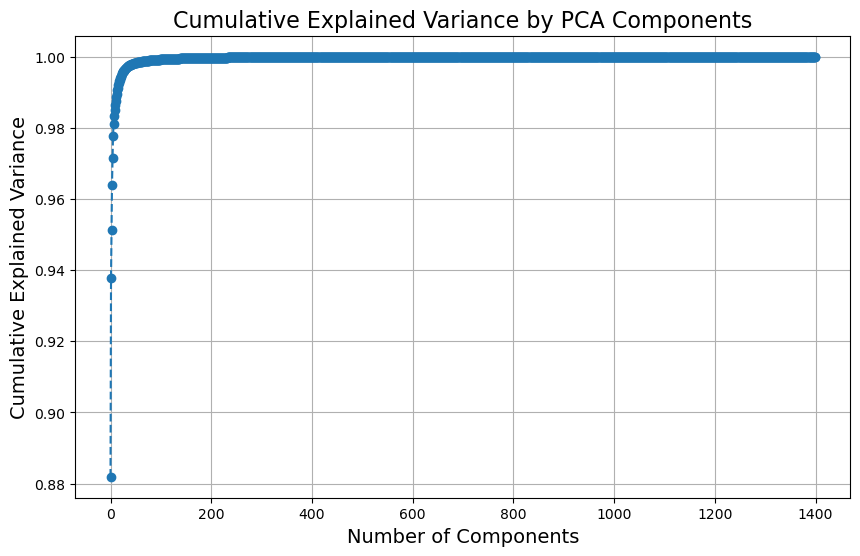

Number of components explaining 95% of the variance: 3


In [101]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


x_val_dff = x_val_df.iloc[:, 1:]

# PCA
pca = PCA()
x_val_pca = pca.fit_transform(x_val_dff)

# explaned variance rate
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# visualization
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components', fontsize=16)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.grid(True)
plt.show()

# 95% variance
n_components = next(i for i, total in enumerate(cumulative_variance_ratio) if total >= 0.95) + 1
print(f"Number of components explaining 95% of the variance: {n_components}")

# PCA with the determined number of components
pca = PCA(n_components=n_components)
x_val_pca = pca.fit_transform(x_val_dff)

In [102]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
x_val_tsne = tsne.fit_transform(x_val_pca)

# Results to dataframe
x_val_dff['tsne_1'] = x_val_tsne[:, 0]
x_val_dff['tsne_2'] = x_val_tsne[:, 1]  # This should be tsne_2

In [103]:
# Match series
match_series = x_val_df['Metadata_broad_sample'].isin(dna_comp['BROAD_ID'])
x_val_dff['cluster'] = match_series.astype(int)

match_series = x_val_df['Metadata_broad_sample'].isin(ros_comp['BROAD_ID'])
x_val_dff['cluster1'] = match_series.astype(int)

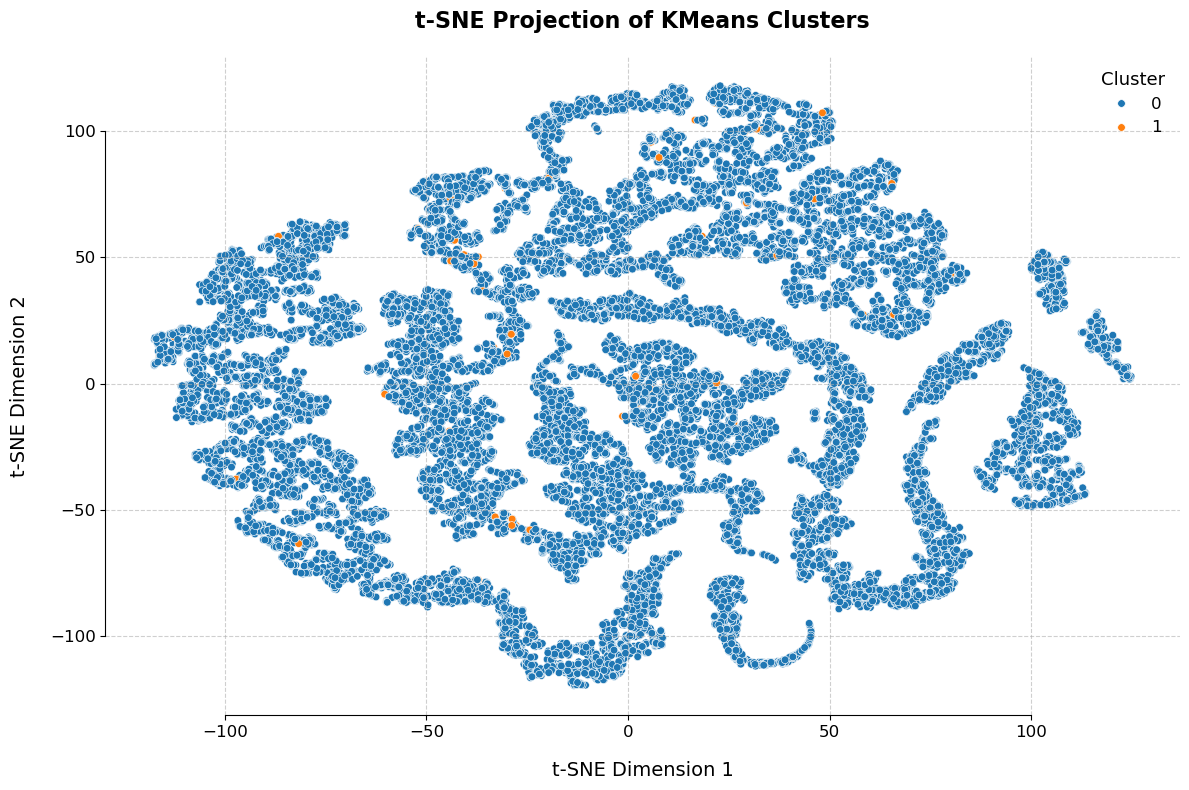

In [104]:
# Plot t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=x_val_dff, x='tsne_1', y='tsne_2', hue='cluster', palette='tab10', marker='o', s=30, alpha=1.0)
plt.title('t-SNE Projection of KMeans Clusters', fontsize=16, weight='bold', pad=20)
plt.xlabel('t-SNE Dimension 1', fontsize=14, labelpad=15)
plt.ylabel('t-SNE Dimension 2', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right', frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('t-SNE.png', dpi=300)
plt.show()

In [105]:
import umap

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(x_val_dff)

x_val_dff['umap_1'] = X_umap[:, 0]
x_val_dff['umap_2'] = X_umap[:, 1]

C:\Users\USER\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


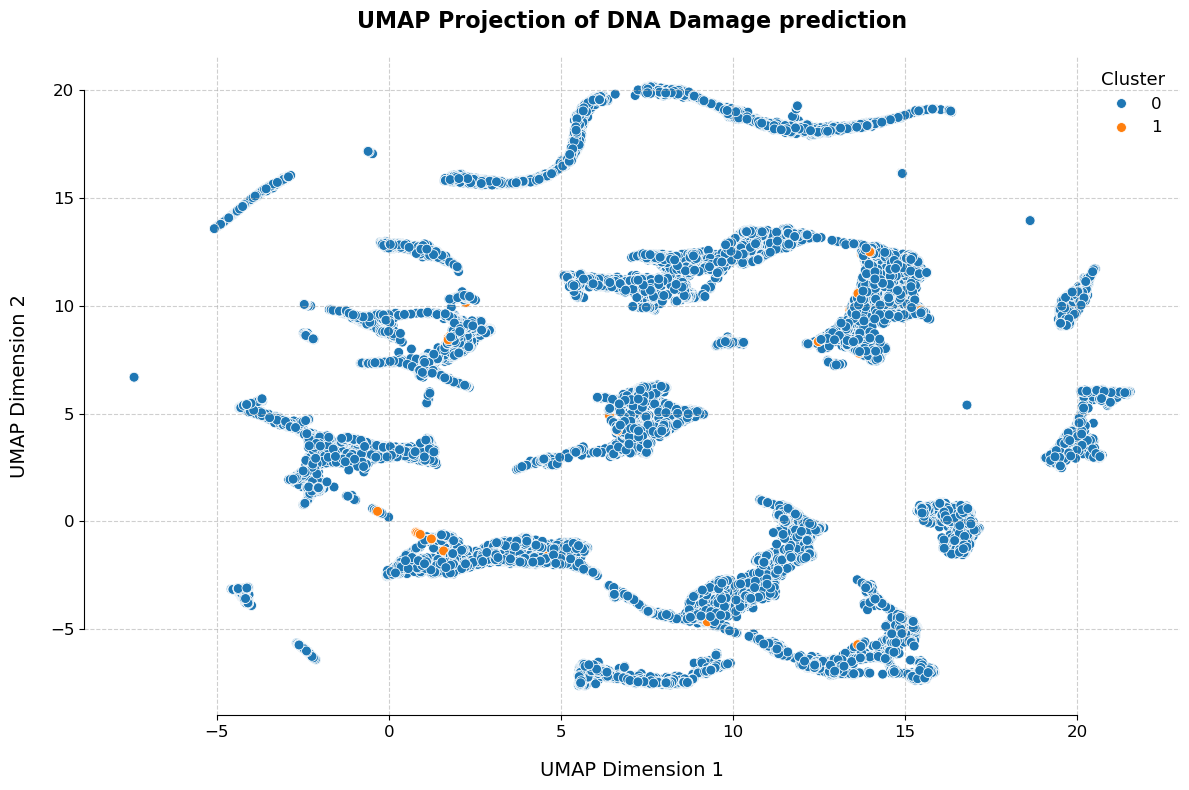

In [108]:
# Visualizaiton
plt.figure(figsize=(12, 8))
sns.scatterplot(data=x_val_dff, x='umap_1', y='umap_2', hue='cluster', palette='tab10', marker='o', s=50, alpha=1.0)
plt.title('UMAP Projection of DNA Damage prediction', fontsize=16, weight='bold', pad=20)
plt.xlabel('UMAP Dimension 1', fontsize=14, labelpad=15)
plt.ylabel('UMAP Dimension 2', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right', frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('UMAP1.png', dpi=300)
plt.show()

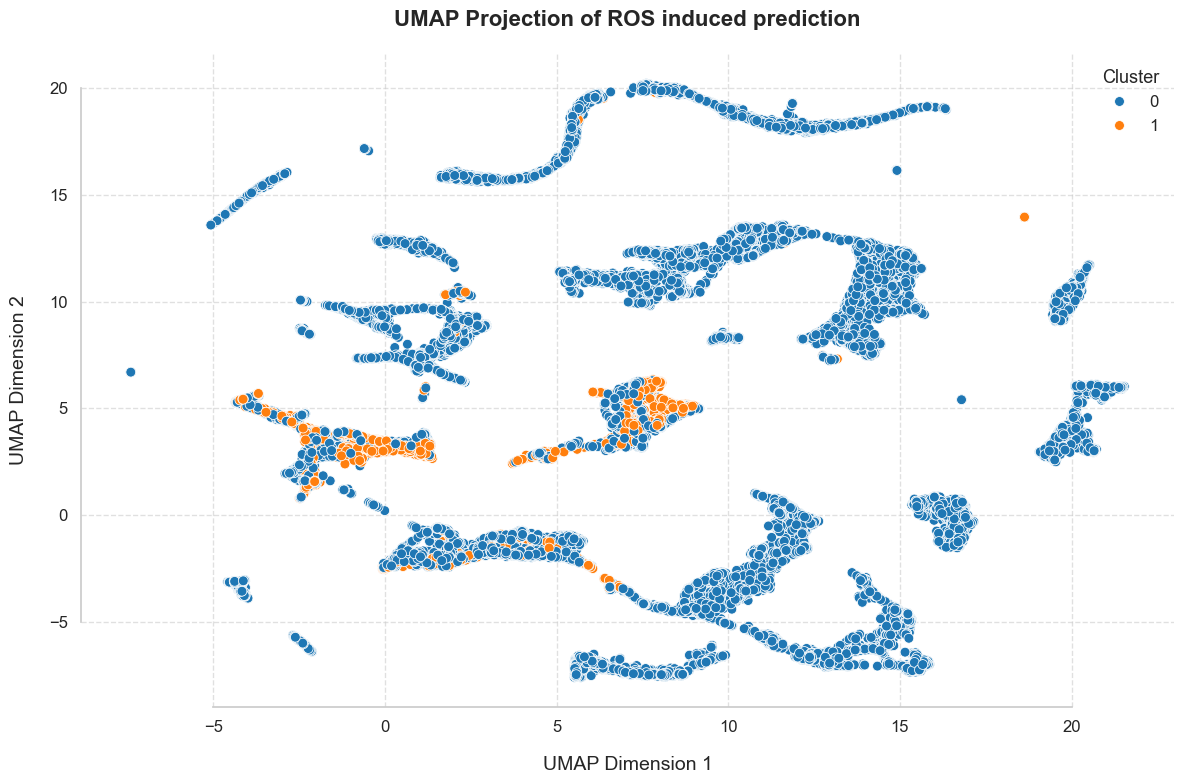

In [114]:
# Visualizaiton
plt.figure(figsize=(12, 8))
sns.scatterplot(data=x_val_dff, x='umap_1', y='umap_2', hue='cluster1', palette='tab10', marker='o', s=50, alpha=1.0)
plt.title('UMAP Projection of ROS induced prediction', fontsize=16, weight='bold', pad=20)
plt.xlabel('UMAP Dimension 1', fontsize=14, labelpad=15)
plt.ylabel('UMAP Dimension 2', fontsize=14, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Cluster', title_fontsize='13', fontsize='12', loc='upper right', frameon=False)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig('UMAP2.png', dpi=300)
plt.show()